In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# SQL Capstone Project

SportsStats is a sports analysis firm partnering with local news and elite personal trainers to provide “interesting” insights to help their partners.  Insights could be patterns/trends highlighting certain groups/events/countries, etc. for the purpose of developing a news story or discovering key health insights.


In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the data using pandas

athlete_events = pd.read_csv('../Dataset/athlete_events.csv')
noc_data = pd.read_csv('../Dataset/noc_regions.csv')

## Dataset - 


The dataset has the following features of several sport personalities - 



In [3]:
colm_name = athlete_events.columns
print("Info about player stats from 'athlete_events' file \n")
athlete_events.info()

print('\n\n')

print("Info about NOC from 'noc_regions' file\n ")
noc_data.info()
print('\n\n')

Info about player stats from 'athlete_events' file 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB



Info about NOC from 'noc_regions' file
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data colum

##  Data Cleaning

Currently we have two datasets, one with statistics of the player while other connects the NOC with specific regions. Let's first combine the two tables. 

From above stats (non-null count), notice that there are null elements present in certain columns like Age, Width, Height and Medals. Instead of removing them now, we will handle them later when constructing more refined tables desinged for our specific queries. This would avoid potential loss of data. 

In [4]:
from pandasql import sqldf
#Combine the datasets
pysqldf = lambda q:sqldf(q, globals())
player_stats = pysqldf('SELECT ath.*, noc.region AS Region\
                        FROM athlete_events AS ath \
                        LEFT OUTER JOIN noc_data AS noc \
                        ON ath.NOC=noc.NOC \
                        ORDER BY noc.NOC')
    

In [5]:


#Check if some entry is missing from one data
noc_noc = set(noc_data.NOC.unique())
ply_noc = set(athlete_events.NOC.unique())

print("Following NOC element from 'athlete_events' data do not exist in 'noc_regions' data = {}".format(ply_noc - noc_noc))
print("Updated Combined Dataset")

#Combine the datasets
pysqldf = lambda q:sqldf(q, globals())
player_stats = pysqldf('SELECT ath.*, noc.region AS Region\
                        FROM athlete_events AS ath \
                        LEFT OUTER JOIN noc_data AS noc \
                        ON ath.NOC=noc.NOC \
                        ORDER BY noc.NOC')


#Check if data has been added
player_stats.info()
player_stats.head(20)

Following NOC element from 'athlete_events' data do not exist in 'noc_regions' data = {'SGP'}
Updated Combined Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 33.1+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
0,332,Zarinah Abdullah,F,21.0,NaN,NaN,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,None,None
1,332,Zarinah Abdullah,F,25.0,NaN,NaN,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,None,None
2,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,None,None
3,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,None,None
4,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,None,None
5,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Butterfly,None,None
6,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Medley Relay,None,None
7,4264,Ang Peng Siong,M,25.0,180.0,75.0,Singapore,SGP,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 50 metres Freestyle,None,None
8,4264,Ang Peng Siong,M,25.0,180.0,75.0,Singapore,SGP,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 100 metres Freestyle,None,None
9,4264,Ang Peng Siong,M,25.0,180.0,75.0,Singapore,SGP,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,None,None


In [6]:
print("Let's also look at basic stats - ")
print("First recorded year  = {}, Last recorded Year = {}".format(min(player_stats.Year), max(player_stats.Year)))
uniq_names = player_stats.Name.unique()

print("Total Number of Players = {}".format(uniq_names.size))
print("Total Number of Teams = {}".format(player_stats.Team.unique().size))
print("Number of NOC = {} and Regions = {}".format(player_stats.NOC.unique().size, player_stats.Region.unique().size))
print("Number of Events = {}".format(player_stats.Event.unique().size))

Let's also look at basic stats - 
First recorded year  = 1896, Last recorded Year = 2016
Total Number of Players = 134732
Total Number of Teams = 1184
Number of NOC = 230 and Regions = 206
Number of Events = 765


## ERD 

Let's construct the ERD diagram. We can break the above table into four subtables  - 
* Player Record - Describes player's performance in an event
* Player Info - Provide player's physical stats
* Team Info - Provides information about a team 
* Game Info - Provides information about a game. 




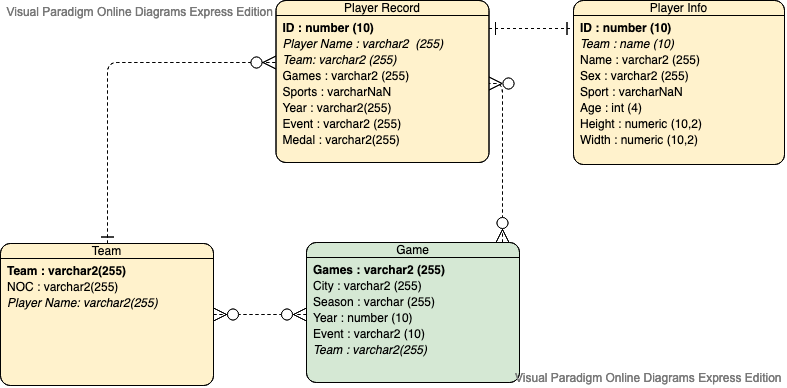

In [7]:
from IPython.display import Image
Image("../Dataset/ERD.png")

## Questions - 

I would like to analyse the data to answer the following questions - 

   1. Are females atheletes equally represented as males in different regions? 
   2. Does there exist a bias between player’s age and the sports?
   3. Does the height of player provide him advantage/disadvantage in certain sports?
   4. Are all sports dominated by few countries or the distribution varies depending on the sports?
   
Exploring these questions could provide interesting insights about any traditional biases (if it exists) in the sports and help in looking for solutions. This can lead to interesting stories in journalism which is a prominent partnership area. Such insights can also help trainers and team owners to focus more on the weaker sections or help countries analyse their performance and find the possible ways to improve. 

# Exploring Dataset - Initial Analysis

Let's perform some exploratory analysis to get a sense of data and frame our hypothesis

## Male vs Female participation

Now, let's dive a bit into the dataset. Let us first look at total number of male and female players. From the below results, we see that total number of male players largely dominate total number of female players over the years. 

We can further look at the data to see the distribution of male and female players grouped by regions. From the query below, we can clearly see the disparity in participation of females over males in several regions.  

In [8]:
#Check regions with more then 1 NOC
#pysqldf("SELECT Region, COUNT(NOC) FROM (SELECT NOC, Region FROM player_stats  GROUP BY NOC) GROUP BY Region ORDER BY COUNT(NOC) DESC LIMIT 5" )

total_players = np.size(player_stats.ID.unique())
male_players  = np.size(player_stats[player_stats.Sex=='M'].ID.unique())
female_players  = np.size(player_stats[player_stats.Sex=='F'].ID.unique())

assert total_players == male_players+female_players, "Total players !=male players + female players. Please check your query."

print("Male Players = {}, Female Players = {}, difference = {}".format(male_players, female_players, male_players-female_players))



Male Players = 101590, Female Players = 33981, difference = 67609


In [9]:
#Number of players of each sex from each region

player_sex_df = pysqldf("SELECT Region, Sex, COUNT(ID) FROM player_stats  GROUP BY Sex, Region ORDER BY Region LIMIT 10")
display(player_sex_df)

,Region,Sex,COUNT(ID)
0,None,F,136
1,None,M,234
2,Afghanistan,F,5
3,Afghanistan,M,121
4,Albania,F,27
5,Albania,M,43
6,Algeria,F,94
7,Algeria,M,457
8,American Samoa,F,7
9,American Samoa,M,30


## Age distribution of players

Here we look at the age distribution of all the players who participated in the games. We find that average distribution of players' age follows a gaussian distribution with a mean of ~24.5 years and standard distribution of 5.7 years. 

In [10]:

player_unique = pysqldf("SELECT ID, NAME, AGE, SEX FROM player_stats GROUP BY ID")


Average age of players = 24.490692940566394, Standard Deviation = 5.7120238071898966


Text(0, 0.5, 'Total Players Count')

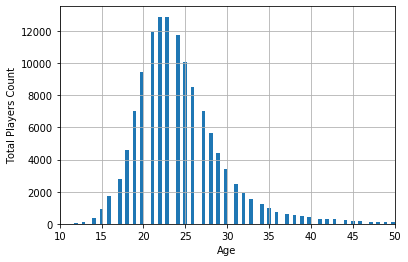

In [11]:
print("Average age of players = {}, Standard Deviation = {}".format(player_unique.Age.mean(), np.sqrt(player_unique.Age.var())))
#Bins >=200 else distribution would depend on the bin size
age_hist = player_unique.Age.hist(bins=200)
age_hist.set_xlim(10,50)
age_hist.set_xlabel('Age')
age_hist.set_ylabel('Total Players Count')

## Regions with most awards

As can be seen from the plot below, a few nations like Germany, USA and Russia have clearly won a large number of medals compares to most other countries over the years

Text(0, 0.5, 'Number of Medals')

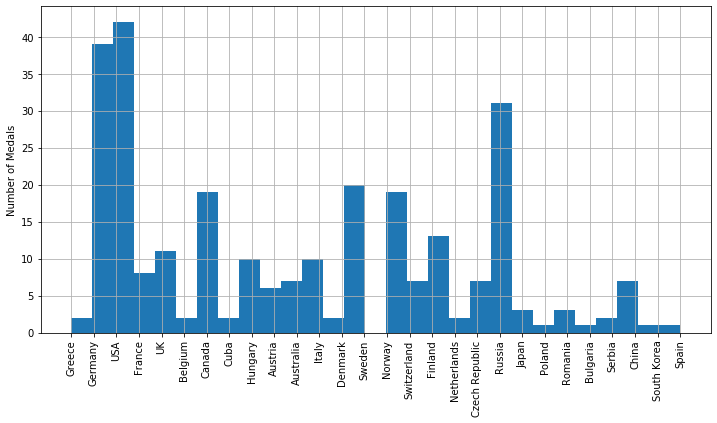

In [12]:
#Find the top five regions with highest number of medals 
game_stats = pysqldf("SELECT * FROM (SELECT  Games, Region, DENSE_RANK() OVER (PARTITION BY Games ORDER BY Total_Medals_Won DESC) AS ranking FROM (SELECT Games, Region, Count(Medal)  AS Total_Medals_Won FROM player_stats WHERE NOT(Medal ISNULL) GROUP BY Games, Region ORDER BY Games ASC, COUNT(Medal) DESC)) WHERE ranking<6")
game_hist = game_stats.Region.hist(xrot=90, figsize=(12,6), bins=29)
game_hist.set_ylabel('Number of Medals') 

## Assumptions

* The provided dataset holds no bias against players of any countries, sex, age, sports or any other catagories. The data is not misrepresentated or false. 
* The sports itself provides equal opportunities to players of all age, sex and nationality. That is, either there are no restriction of partipation of any player based on his age, sex or nationality, or there exists separate events for people of different sex or age (eg. Man's tournament and Women's tournaments). 

## Hypothesis - 

From basic analysis from above, I make the following hypothesis

1. The representation of males and femaled may be more fair in developed nations compared to developing nations, where opportunities are not equally available. 
2. Representation of players of different age groups should not vary a lot between different countries. 
3. Certain sports such as basketball, relays etc might prove more advantageous for taller people. 
4. More developed nations would have higher dominance in majority of sports due to better infrastructure and opportunities provided to their players. 
